# G2M insight for Cab Investment firm

### The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a **presentation to XYZ’s Executive team**. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

### Data Set:

Time period of data is from 01/31/2016 to 12/31/2018.

Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

----------------------------------------------------------------------------------------

## 1. Data Sets Investigation

### 1.1 Cab_Data.csv

In [47]:
import pandas as pd
import numpy as np

In [48]:
cab_data = pd.read_csv("./Dataset/Cab_Data.csv")

In [49]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [50]:
cab_data["Company"].unique(), cab_data["City"].unique()

(array(['Pink Cab', 'Yellow Cab'], dtype=object),
 array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
        'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
        'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
        'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
        'TUCSON AZ', 'WASHINGTON DC'], dtype=object))

In [51]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [52]:
cab_data[["KM Travelled", "Price Charged", "Cost of Trip"]].describe()

,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113
std,12.233526,274.378911,157.993661
min,1.900000,15.600000,19.000000
25%,12.000000,206.437500,151.200000
50%,22.440000,386.360000,282.480000
75%,32.960000,583.660000,413.683200
max,48.000000,2048.030000,691.200000


In [53]:
# Time Analysis - Unit Conversion
from datetime import datetime, timedelta
def to_date(n):
    date_str =(datetime(1900,1,1) + timedelta(n-2)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

cab_data['Date']=cab_data['Date of Travel'].apply(lambda x:to_date(x))
cab_data.head(20) 

# Check with Excel Date Format => First 20 item Date of Travel2 are same. 
# Confirm and Verify that my to_date function is Correct.

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-08
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-06
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-02
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-07
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-03
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024,2016-01-07
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200,2016-01-03
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890,2016-01-07
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880,2016-01-12
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256,2016-01-06


In [54]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  int64         
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Date            359392 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 21.9+ MB


### 1.2 Customer_ID.csv

In [55]:
cust_ID = pd.read_csv("./Dataset/Customer_ID.csv")

In [56]:
cust_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [57]:
cust_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [58]:
cust_ID["Customer ID"].duplicated().sum()

0

In [59]:
cust_ID[["Age", "Income (USD/Month)"]].describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


### 1.3 Transaction_ID.csv 

In [60]:
trans_ID = pd.read_csv("./Dataset/Transaction_ID.csv")

In [61]:
trans_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [62]:
trans_ID["Payment_Mode"].unique()

array(['Card', 'Cash'], dtype=object)

In [106]:
trans_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


### 1.4 City.csv 

In [63]:
city = pd.read_csv("./Dataset/City.csv")

In [64]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [65]:
city["City"].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [107]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


### 1.5 Holiday Data

In [66]:
holiday = pd.read_csv("./Dataset/US Holiday Dates (2004-2021).csv")

In [67]:
holiday.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [68]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [69]:
holiday['Date'] = pd.to_datetime(holiday['Date'])
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     342 non-null    datetime64[ns]
 1   Holiday  342 non-null    object        
 2   WeekDay  342 non-null    object        
 3   Month    342 non-null    int64         
 4   Day      342 non-null    int64         
 5   Year     342 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 16.2+ KB


In [70]:
holiday.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


### 1.6 Merging all dataset to One

In [71]:
df = pd.merge(cab_data, trans_ID, on = "Transaction ID")

In [72]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-08,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-06,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-02,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-07,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-03,27182,Card


In [73]:
df = pd.merge(df, cust_ID, on = "Customer ID")

In [74]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,27703,Card,Male,27,9237


In [75]:
df = pd.merge(df, city, on = "City")

In [76]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,27703,Card,Male,27,9237,"814,885","24,701"


In [81]:
df['holiday'] = cab_data['Date'].isin(holiday['Date']).apply(lambda x: 1 if x == True else 0)

In [82]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,holiday
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,29290,Card,Male,28,10813,"814,885","24,701",0
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,29290,Cash,Male,28,10813,"814,885","24,701",0
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,29290,Card,Male,28,10813,"814,885","24,701",0
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,27703,Card,Male,27,9237,"814,885","24,701",0
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,27703,Card,Male,27,9237,"814,885","24,701",0


In [87]:
df[df['holiday']==1].count()

Transaction ID        18644
Date of Travel        18644
Company               18644
City                  18644
KM Travelled          18644
Price Charged         18644
Cost of Trip          18644
Date                  18644
Customer ID           18644
Payment_Mode          18644
Gender                18644
Age                   18644
Income (USD/Month)    18644
Population            18644
Users                 18644
holiday               18644
dtype: int64

In [88]:
df[df['holiday']==0].count()

Transaction ID        340748
Date of Travel        340748
Company               340748
City                  340748
KM Travelled          340748
Price Charged         340748
Cost of Trip          340748
Date                  340748
Customer ID           340748
Payment_Mode          340748
Gender                340748
Age                   340748
Income (USD/Month)    340748
Population            340748
Users                 340748
holiday               340748
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  int64         
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Date                359392 non-null  datetime64[ns]
 8   Customer ID         359392 non-null  int64         
 9   Payment_Mode        359392 non-null  object        
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income (USD/Month)  359392 non-null  int64         
 13  Population          359392 no

## 2. EDA (Exploratory Data Analysis)

In [90]:
df.describe(include='all')

/tmp/ipykernel_81233/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,holiday
count,3.593920e+05,359392.000000,359392,359392,359392.000000,359392.000000,359392.000000,359392,359392.000000,359392,359392,359392.000000,359392.000000,359392,359392,359392.000000
unique,NaN,NaN,2,19,NaN,NaN,NaN,1095,NaN,2,2,NaN,NaN,19,19,NaN
top,NaN,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,2018-01-05 00:00:00,NaN,Card,Male,NaN,NaN,"8,405,837","302,149",NaN
freq,NaN,NaN,274681,99885,NaN,NaN,NaN,2022,NaN,215504,205912,NaN,NaN,99885,99885,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.022076e+07,42964.067998,NaN,NaN,22.567254,423.443311,286.190113,NaN,19191.652115,NaN,NaN,35.336705,15048.822937,NaN,NaN,0.051877
std,1.268058e+05,307.467197,NaN,NaN,12.233526,274.378911,157.993661,NaN,21012.412463,NaN,NaN,12.594234,7969.409482,NaN,NaN,0.221778
min,1.000001e+07,42371.000000,NaN,NaN,1.900000,15.600000,19.000000,NaN,1.000000,NaN,NaN,18.000000,2000.000000,NaN,NaN,0.000000
25%,1.011081e+07,42697.000000,NaN,NaN,12.000000,206.437500,151.200000,NaN,2705.000000,NaN,NaN,25.000000,8424.000000,NaN,NaN,0.000000


### Pink Cab vs Yellow Cab

I want to compare pink cab and yellow cab 's data to answer following:

1. Profit
2. Customer Summary
3. City Summary
4. Holiday Effect

In [100]:
# Creating new interesting features
df['Profit']       = df['Price Charged'] - df['Cost of Trip']
df['Profit Rate']  = df['Profit']/df['Cost of Trip']
df['Profit per KM']= df['Profit']/df['KM Travelled']

df['Users']        = df['Users'].str.replace(',','')
df['Population']   = df['Population'].str.replace(',','')

df['Customer Rate']= df['Users'].astype(int)/df['Population'].astype(int)

df['Month']        = df['Date'].dt.month
df['Year']         = df['Date'].dt.year


In [101]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Customer ID,Payment_Mode,...,Income (USD/Month),Population,Users,holiday,Profit,Profit Rate,Profit per KM,Customer Rate,Month,Year
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,29290,Card,...,10813,814885,24701,0,57.3150,0.182744,1.882266,0.030312,1,2016
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,29290,Cash,...,10813,814885,24701,0,281.2772,0.886128,10.739870,0.030312,7,2018
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,29290,Card,...,10813,814885,24701,0,194.6480,0.325824,4.574571,0.030312,11,2018
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,27703,Card,...,9237,814885,24701,0,23.6660,0.070676,0.826904,0.030312,1,2016
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,27703,Card,...,9237,814885,24701,0,253.9808,0.543717,6.981330,0.030312,4,2018


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 Profit Comparasion

#### 2.1.1 Profit Comparasion Plot 

<AxesSubplot:xlabel='Profit', ylabel='Count'>

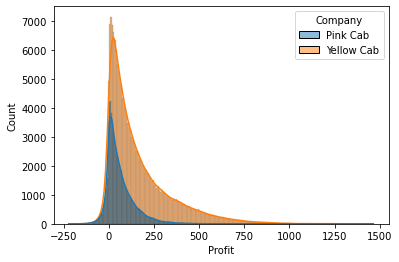

In [103]:
sns.histplot(data = df, x="Profit", hue = "Company", kde=True)

<AxesSubplot:xlabel='Profit Rate', ylabel='Count'>

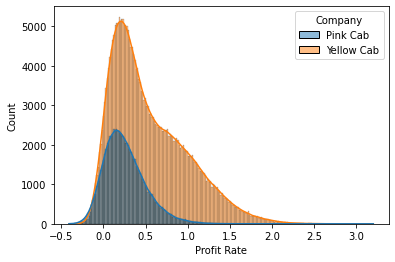

In [104]:
sns.histplot(data = df, x="Profit Rate", hue = "Company", kde=True)

<AxesSubplot:xlabel='Profit per KM', ylabel='Count'>

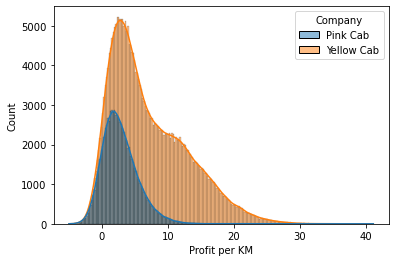

In [105]:
sns.histplot(data = df, x="Profit per KM", hue = "Company", kde=True)

#### 2.1.2. Profit Monthly Plot

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  int64         
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Date                359392 non-null  datetime64[ns]
 8   Customer ID         359392 non-null  int64         
 9   Payment_Mode        359392 non-null  object        
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income (USD/Month)  359392 non-null  int64         
 13  Population          359392 no

In [118]:
Monthly_rate = df.groupby(['Month', 'Company']).mean()

In [119]:
Monthly_Profit_rate = Monthly_rate['Profit Rate']

In [120]:
Monthly_Profit_rate

Month  Company   
1      Pink Cab      0.313792
       Yellow Cab    0.623443
2      Pink Cab      0.305108
       Yellow Cab    0.673256
3      Pink Cab      0.281947
       Yellow Cab    0.614161
4      Pink Cab      0.246736
       Yellow Cab    0.601415
5      Pink Cab      0.139662
       Yellow Cab    0.722468
6      Pink Cab      0.161451
       Yellow Cab    0.644309
7      Pink Cab      0.188902
       Yellow Cab    0.458159
8      Pink Cab      0.205970
       Yellow Cab    0.410962
9      Pink Cab      0.209426
       Yellow Cab    0.516431
10     Pink Cab      0.270152
       Yellow Cab    0.476729
11     Pink Cab      0.300569
       Yellow Cab    0.490647
12     Pink Cab      0.360401
       Yellow Cab    0.496574
Name: Profit Rate, dtype: float64

<AxesSubplot:xlabel='Month'>

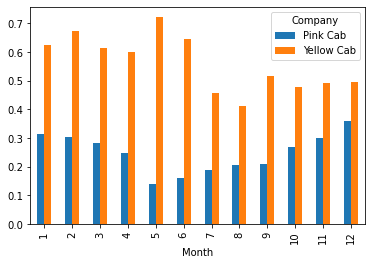

In [126]:
Monthly_Profit_rate.unstack().plot(kind='bar')

#### 2.1.3 Profit Yearly Plot

In [129]:
Yearly_rate = df.groupby(['Year', 'Company']).mean()
Yearly_Profit_rate = Yearly_rate['Profit Rate']

In [130]:
Yearly_Profit_rate

Year  Company   
2016  Pink Cab      0.279103
      Yellow Cab    0.572142
2017  Pink Cab      0.273194
      Yellow Cab    0.572450
2018  Pink Cab      0.217275
      Yellow Cab    0.486794
Name: Profit Rate, dtype: float64

<AxesSubplot:xlabel='Year'>

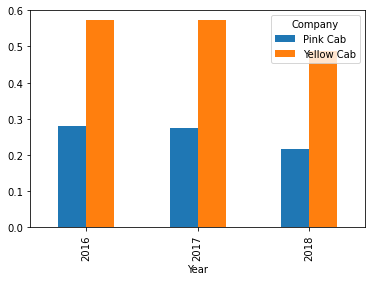

In [131]:
Yearly_Profit_rate.unstack().plot(kind='bar')

#### 2.1.4 Profit Comparasion Summary

Both companies have strong right skew distributions. Comparing two companies, Yellow Cab profit is higher than Pink Cab. I also look at monthly and yearly profit rate for each company. Profit rates in 2016 and 2017 do not change but profit rates drop in 2018. Yellow Cab has the most profit rates in May but Pink Cab has the most profit in December

### 2.2 Customer Summary

#### 2.2.1 Gender

Text(0.5, 1.0, 'Gender Ratio (Combined two cab companies)')

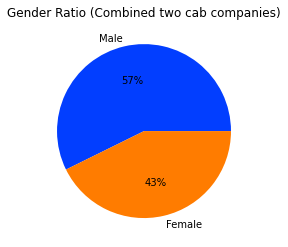

In [134]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')


data = [100.0* len(df[df['Gender']=='Male'])/len(df), 100.0* len(df[df['Gender']=='Female'])/len(df)]
keys = ['Male', 'Female']

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Gender Ratio (Combined two cab companies)")

Text(0.5, 1.0, 'Yellow Cap Gender Ratio')

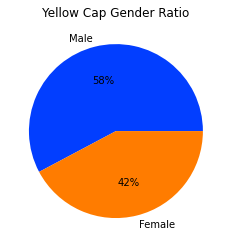

In [139]:
# Yellow Cab 
m = len(df[(df['Gender'] == 'Male') & (df['Company'] == 'Yellow Cab')])
f = len(df[(df['Gender'] == 'Female') & (df['Company'] == 'Yellow Cab')])
t = len(df[df['Company'] == 'Yellow Cab'])

data = [100.0* m/t, 100.0* f/t]
keys = ['Male', 'Female']

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Yellow Cap Gender Ratio")

Text(0.5, 1.0, 'Pink Cap Gender Ratio')

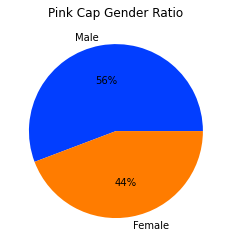

In [141]:
# Pink Cab 
m = len(df[(df['Gender'] == 'Male') & (df['Company'] == 'Pink Cab')])
f = len(df[(df['Gender'] == 'Female') & (df['Company'] == 'Pink Cab')])
t = len(df[df['Company'] == 'Pink Cab'])

data = [100.0* m/t, 100.0* f/t]
keys = ['Male', 'Female']

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Pink Cap Gender Ratio")

Gender ratio is similiar to both cap companies. Male is about 57% and Female is about 43%. 

#### 2.2.2 Age

[22437, 116430, 112735, 47017, 38087, 22686]


Text(0.5, 1.0, 'Age Range Ratio')

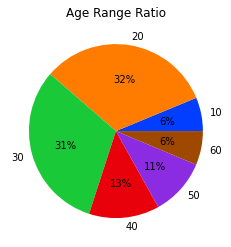

In [152]:
# Calculate the range of ages for each decade
age_ranges = [10, 20, 30, 40, 50, 60]
bin_counts = [0, 0 ,0, 0, 0, 0]

for age in df['Age']:
    idx = (age-10)//10
    bin_counts[idx] += 1

print(bin_counts)
bin_counts = np.array(bin_counts)*100/sum(bin_counts)

# plotting data on chart
plt.pie(bin_counts, labels=age_ranges, colors=palette_color, autopct='%.0f%%')
plt.title("Age Range Ratio")


[16940, 88960, 86327, 36086, 29111, 17257]


Text(0.5, 1.0, 'Yellow Cab Age Range Ratio')

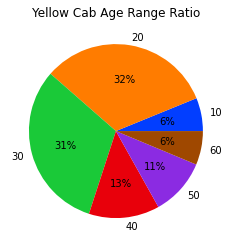

In [157]:
# Yellow Cab
bin_counts = [0, 0 ,0, 0, 0, 0]

for age in df[df['Company']=='Yellow Cab']['Age']:
    idx = (age-10)//10
    bin_counts[idx] += 1

print(bin_counts)
bin_counts = np.array(bin_counts)*100/sum(bin_counts)

# plotting data on chart
plt.pie(bin_counts, labels=age_ranges, colors=palette_color, autopct='%.0f%%')
plt.title("Yellow Cab Age Range Ratio")

[5497, 27470, 26408, 10931, 8976, 5429]


Text(0.5, 1.0, 'Pink Cab Age Range Ratio')

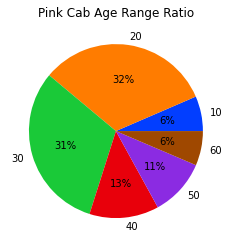

In [156]:
# Pink Cab
bin_counts = [0, 0 ,0, 0, 0, 0]

for age in df[df['Company']=='Pink Cab']['Age']:
    idx = (age-10)//10
    bin_counts[idx] += 1

print(bin_counts)
bin_counts = np.array(bin_counts)*100/sum(bin_counts)

# plotting data on chart
plt.pie(bin_counts, labels=age_ranges, colors=palette_color, autopct='%.0f%%')
plt.title("Pink Cab Age Range Ratio")

Age ratio is exactly same for both cab companies. No difference found.

#### 2.2.3 Income 

<AxesSubplot:xlabel='Income (USD/Month)', ylabel='Count'>

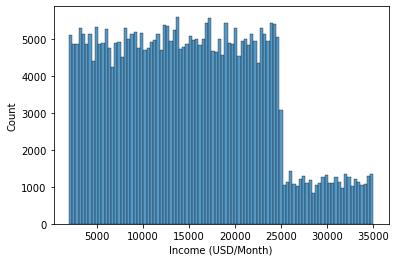

In [160]:
sns.histplot(data=df, x = 'Income (USD/Month)')  

<AxesSubplot:xlabel='Income (USD/Month)', ylabel='Count'>

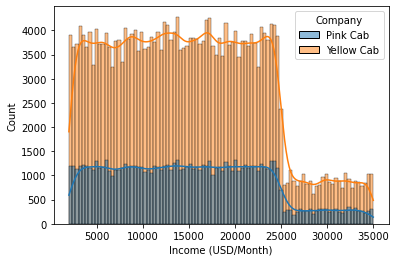

In [161]:
sns.histplot(data=df, x = 'Income (USD/Month)', hue='Company', kde=True)  

I do not find any significant difference on customer's incomes between two cab companies

#### 2.2.4 Payment Type

Text(0.5, 1.0, 'Payment Type Ratio (Combined two cab companies)')

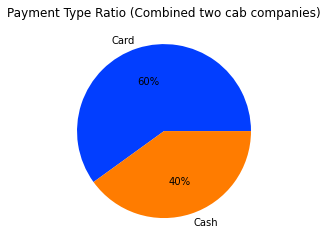

In [163]:
data = [100.0* len(df[df['Payment_Mode']=='Card'])/len(df), 100.0* len(df[df['Payment_Mode']=='Cash'])/len(df)]
keys = ['Card', 'Cash']

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Payment Type Ratio (Combined two cab companies)")

Text(0.5, 1.0, 'Yellow Cap Payment Type Ratio')

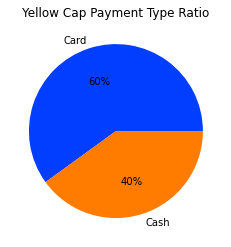

In [164]:
# Yellow Cab 
m = len(df[(df['Payment_Mode'] == 'Card') & (df['Company'] == 'Yellow Cab')])
f = len(df[(df['Payment_Mode'] == 'Cash') & (df['Company'] == 'Yellow Cab')])
t = len(df[df['Company'] == 'Yellow Cab'])

data = [100.0* m/t, 100.0* f/t]

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Yellow Cap Payment Type Ratio")

Text(0.5, 1.0, 'Pink Cap Payment Type Ratio')

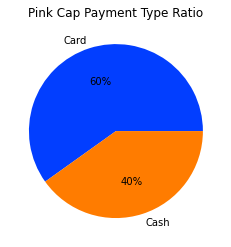

In [165]:
# Pink Cab 
m = len(df[(df['Payment_Mode'] == 'Card') & (df['Company'] == 'Pink Cab')])
f = len(df[(df['Payment_Mode'] == 'Cash') & (df['Company'] == 'Pink Cab')])
t = len(df[df['Company'] == 'Pink Cab'])

data = [100.0* m/t, 100.0* f/t]

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Pink Cap Payment Type Ratio")

There is no differece between payment type ratio on both cab compaines.

#### 2.2.5 Summary

From customer dataset, I do not find any statsitcal difference between two cab companies. Ratio is almost identical on age/gender/income/ and payment type. 

### 2.3 City Summary

In [166]:
df["City"].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [167]:
df["City"].nunique()

19

There are 19 cities in the dataset.

In [170]:
df["City"].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

#### 2.3.1 City - Profit Correlation

In [175]:
city_company = df.groupby(['City', 'Company']).mean()
city_company_profit = city_company['Profit Rate']

In [176]:
city_company_profit

City            Company   
ATLANTA GA      Pink Cab      0.223666
                Yellow Cab    0.443459
AUSTIN TX       Pink Cab      0.331246
                Yellow Cab    0.426399
BOSTON MA       Pink Cab      0.206820
                Yellow Cab    0.209912
CHICAGO IL      Pink Cab      0.140626
                Yellow Cab    0.220534
DALLAS TX       Pink Cab      0.078347
                Yellow Cab    0.661560
DENVER CO       Pink Cab      0.119615
                Yellow Cab    0.499406
LOS ANGELES CA  Pink Cab      0.231137
                Yellow Cab    0.393751
MIAMI FL        Pink Cab      0.330047
                Yellow Cab    0.449017
NASHVILLE TN    Pink Cab      0.142436
                Yellow Cab    0.246218
NEW YORK NY     Pink Cab      0.439939
                Yellow Cab    1.042671
ORANGE COUNTY   Pink Cab      0.276253
                Yellow Cab    0.492021
PHOENIX AZ      Pink Cab      0.176218
                Yellow Cab    0.446256
PITTSBURGH PA   Pink Cab      0.10006

Text(0.5, 1.0, 'Profit Rate for each city')

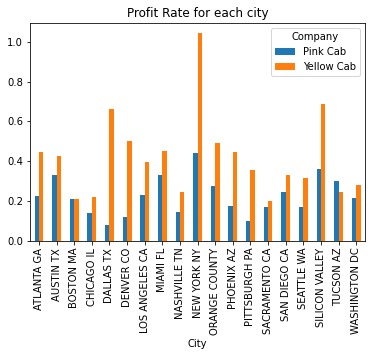

In [178]:
city_company_profit.unstack().plot(kind='bar')
plt.title("Profit Rate for each city")

From the profit rate per city plot, NYC has the highest profit rate for both pink and yello cabs and Silcon Valley is the next highest profit rate for both cab companies. However, I can find a few cities that are interested in: Dallas, Denver, Pittsburgh, Tucson, and D.C. Yello cab has such a high profit rate on three cities: Dallas, Denver, and Pittsburgh. Tucson is only city Pink Cab has higher profit rate than Yellow Cab. 

### 2.4 Holiday Effect

Text(0.5, 1.0, 'Pink Cap Payment Type Ratio')

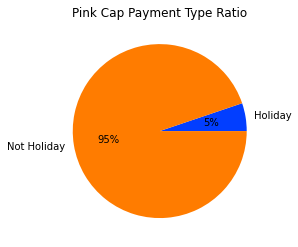

In [185]:
data = [100.0* len(df[df['holiday']==1])/len(df), 100.0* len(df[df['holiday']==0])/len(df)]
keys = ['Holiday', 'Not Holiday']

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Pink Cap Payment Type Ratio")

In [186]:
df['holiday'].value_counts()

0    340748
1     18644
Name: holiday, dtype: int64

#### 2.4.1 Holiday - Profit Correlation

In [187]:
holiday_comp = df.groupby(['holiday', 'Company']).mean()
holiday_comp_profit = holiday_comp['Profit Rate']

In [188]:
holiday_comp_profit

holiday  Company   
0        Pink Cab      0.257055
         Yellow Cab    0.541681
1        Pink Cab      0.226796
         Yellow Cab    0.565926
Name: Profit Rate, dtype: float64

There is an interesting fact that Pink Cab actually has lower profit rate on Holiday unlike Yellow Cab.

## 3. Feature Engineer

### 3.1 Box Plot

<AxesSubplot:xlabel='Price Charged', ylabel='Company'>

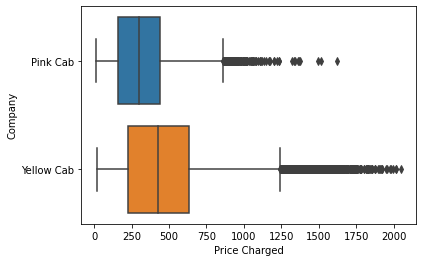

In [190]:
sns.boxplot(data = df, x = "Price Charged", dodge=False, y="Company")

<AxesSubplot:xlabel='Profit Rate', ylabel='Company'>

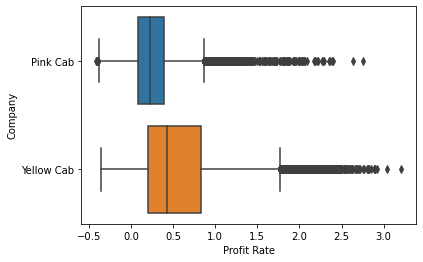

In [192]:
sns.boxplot(data = df, x = "Profit Rate", dodge=False, y="Company")

For Price Charged and Profit Rate, Yellow Cab has higher median value and higher proportion with higher price which cause higher profit rate

<AxesSubplot:xlabel='Users', ylabel='Company'>

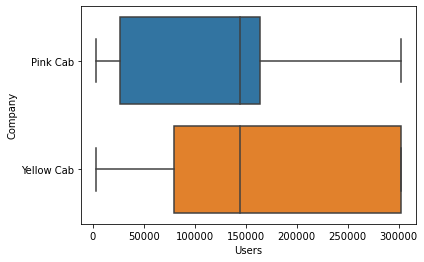

In [196]:
df["Users"] = df["Users"].astype(int)
sns.boxplot(data = df, x = "Users", dodge=False, y="Company")

<AxesSubplot:xlabel='Population', ylabel='Company'>

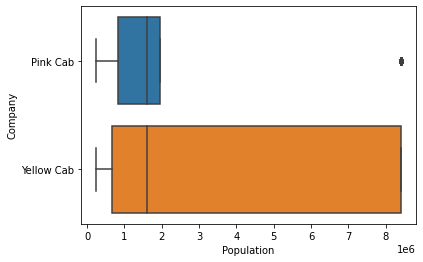

In [199]:
df["Population"] = df["Population"].astype(int)
sns.boxplot(data = df, x = "Population", dodge=False, y="Company")

Users and population box plots indicate that Pink Cab is mainly runnig smaller cities and Yello cab is running mainly bigger cities

### 3.2 Heat Map Plot

<AxesSubplot:>

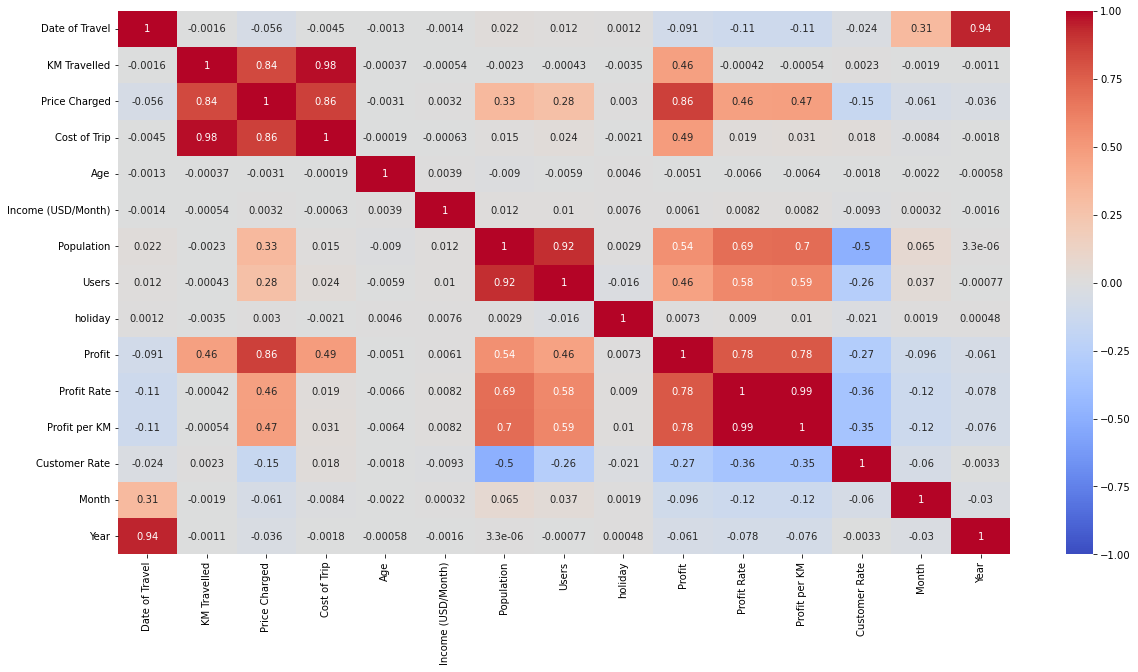

In [213]:
df_ = df.drop(columns=["Transaction ID", "Customer ID"])
corr = df_.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1, cmap='coolwarm')

<AxesSubplot:>

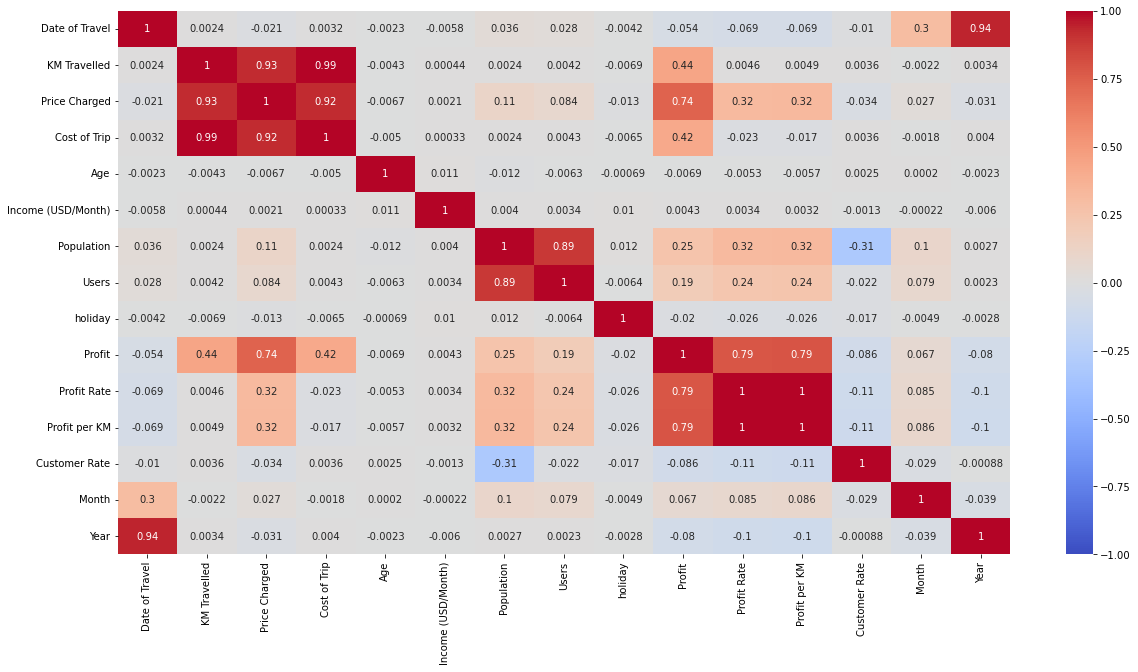

In [214]:
# Pink Cab
pink_df = df_[df_["Company"] == "Pink Cab"]
pink_corr = pink_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(pink_corr,annot=True,vmin=-1,vmax=1, cmap='coolwarm')

<AxesSubplot:>

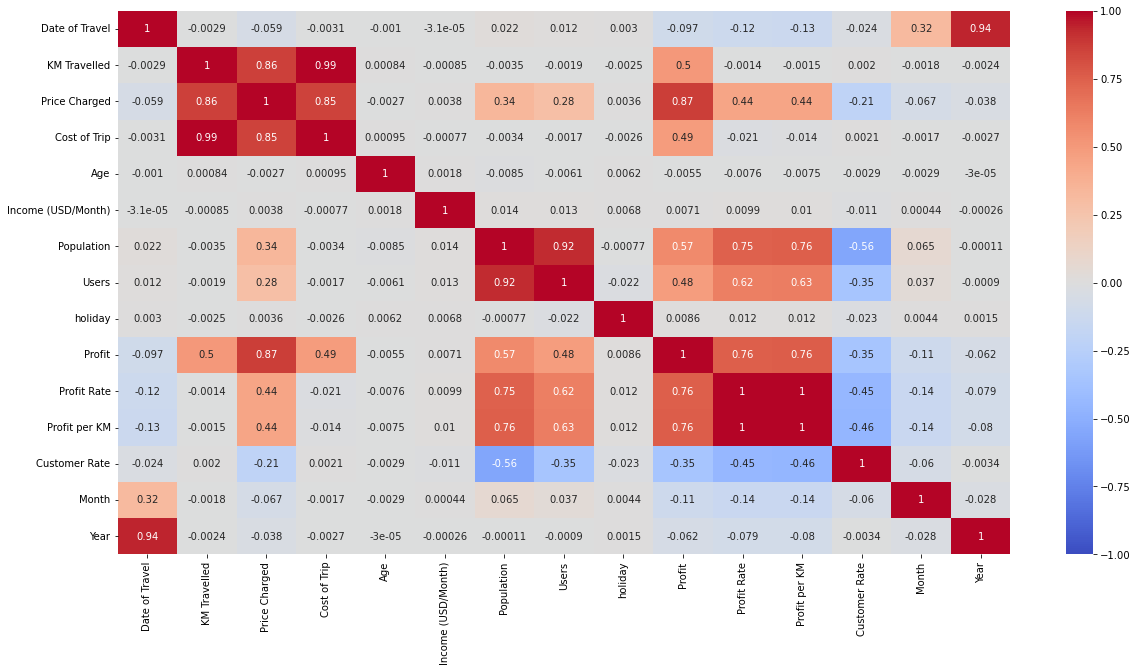

In [215]:
# Yellow Cab
yellow_df = df_[df_["Company"] == "Yellow Cab"]
yellow_corr = yellow_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(yellow_corr,annot=True,vmin=-1,vmax=1, cmap='coolwarm')